In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, accuracy_score, recall_score
import time

In [ ]:
# import sys
# sys.path.append('C:\\Users\\Nachiket\\Documents\\Python-useful_packages\\Boruta-0.1.5')

# from boruta import boruta_py

### Import the data

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("clean_data_52_features.csv",index_col=False)
# df = df.drop(['nr.employed'],axis=1)

In [29]:
df.head(2)

,age,education,default,housing,loan,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdayscat,campcat,poutcome_failure,poutcome_nonexistent,poutcome_success,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,agecat_adult,agecat_senior,agecat_young
0,56,2.0,0.0,0.0,0.0,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,37,5.0,0.0,2.0,0.0,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [3]:
centroids = pd.read_csv("centroids.csv")
df = pd.concat([df, centroids], axis=1)
df.head(2)

,age,education,default,housing,loan,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdayscat,campcat,poutcome_failure,poutcome_nonexistent,poutcome_success,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,agecat_adult,agecat_senior,agecat_young,centroid1
0,56,2.0,0.0,0.0,0.0,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
1,37,5.0,0.0,2.0,0.0,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,2


In [20]:
print ( "{}% positives in the data".format(round(len(df.loc[df.y == 1])*100.0/len(df),2)))

11.26% positives in the data


In [5]:
features = df.drop('y',axis=1)

### Split the data into training and test sets for final testing

In [6]:
X, Xtest, y, ytest = train_test_split(features, df['y'],random_state=1,test_size=0.6)

In [8]:
print(df.shape)
print (X.shape)

(40787, 24)
(28550, 23)


In [56]:
print ( "{}% positives in the test data".format(round(len(ytest.loc[ytest == 1])*100.0/len(ytest),2)))

10.98% positives in the test data


## Normalization

In [45]:
def normalizer(traindata,testdata):
    
    trainnormalized = (traindata-min(traindata))/(max(traindata)-min(traindata))
    testnormalized = (testdata-min(traindata))/(max(traindata)-min(traindata))
    return trainnormalized, testnormalized


for column in X:
    X[column], Xtest[column] = normalizer(X[column],Xtest[column])

# print (X.describe())
Xtest.describe()
# df.education = normalizer(df.education)

C:\Users\Nachiket\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdayscat,agecat,campcat,centroid1
count,24473.000000,24473.000000,24473.000000,24473.000000,24473.000000,24473.000000,24473.000000,24473.000000,24473.000000,24473.000000,24473.000000,24473.000000,24473.000000,24473.000000,24473.000000,24473.000000,24473.000000,24473.000000,24473.000000,24473.000000,24473.000000,24473.000000,24473.000000
mean,0.283923,0.369166,0.585911,0.692532,0.000082,0.535447,0.152413,0.363584,0.469433,0.501062,0.037957,0.962107,0.024937,0.466106,0.725752,0.535725,0.430205,0.677454,0.769487,0.038124,0.024680,0.986638,0.542530
std,0.128404,0.355757,0.302080,0.272923,0.009040,0.498752,0.359428,0.481041,0.258292,0.348854,0.067965,0.190343,0.071512,0.182003,0.326442,0.225093,0.193544,0.392818,0.272711,0.191499,0.138377,0.114820,0.194474
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185185,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.333333,0.250000,0.000000,1.000000,0.000000,0.500000,0.333333,0.340608,0.338912,0.160961,0.512287,0.000000,0.000000,1.000000,0.333333
50%,0.259259,0.200000,0.500000,0.666667,0.000000,1.000000,0.000000,0.000000,0.444444,0.500000,0.024390,1.000000,0.000000,0.500000,0.937500,0.603274,0.376569,0.957379,0.859735,0.000000,0.000000,1.000000,0.666667
75%,0.370370,0.700000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.666667,0.750000,0.048780,1.000000,0.000000,0.500000,1.000000,0.698753,0.602510,0.980957,1.000000,0.000000,0.000000,1.000000,0.666667
max,0.950617,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.341463,1.000000,0.857143,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
if 1==0:
    # L1 Based feature selection
    from sklearn.feature_selection import SelectFromModel
    from sklearn.svm import LinearSVC

    print ("\t\tBefore")
    print (" X - {}".format(X.shape))
    print (" Xtest - {}".format(Xtest.shape))

    lsvc = LinearSVC(C=0.01, penalty="l2", dual=False).fit(X, y)
    model = SelectFromModel(lsvc, prefit=True)
    X = model.transform(X)
    Xtest = model.transform(Xtest)

    print ("\t\tBefore")
    print (" X - {}".format(X.shape))
    print (" Xtest - {}".format(Xtest.shape))

In [51]:
if 1 == 0:
    # Boruta

    # define random forest classifier, with utilising all cores and
    # sampling in proportion to y labels
    forest = RandomForestClassifier(n_jobs=-1, class_weight='auto')

    # define Boruta feature selection method
    feat_selector = boruta_py.BorutaPy(forest, n_estimators='auto', verbose=2)

    # find all relevant features
    feat_selector.fit(X.values, y.values)

    # check selected features
    feat_selector.support_

    # check ranking of features
    feat_selector.ranking_
    
    # call transform() on X to filter it down to selected features
    X_filtered = feat_selector.transform(X.values)
    X_test = feat_selector.transform(Xtest.values)

### Tuning

In [10]:
def cv_score(clf, x, y, score_func=recall_score): #Apply k-fold cross velidation
    result = 0
    nfold = 5
    for train, test in KFold(nfold,random_state=0).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(y[test],clf.predict(x[test])) # evaluate score function on held-out data
    return result / nfold # average

In [7]:
def roccurve(trainedevaluator,plotting=True,X=X,y=y,Xtest=Xtest,ytest=ytest):
    """ Plots ROC Curve and return area under the curve """
    
    #fit
    trainedevaluator.fit(X,y)
    
    #Find probabilities
    preds = trainedevaluator.predict_proba(Xtest)[:,1]
    
    #ROC
    fpr, tpr, _ = roc_curve(ytest, preds)
    
    #Area Under the curve
    area = auc(fpr,tpr)
    
    #Plot
    if plotting == True:
        plt.figure(figsize=(6,6))
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.title("ROC",fontsize=12)
        plt.xlabel("False Positive Rate")
        plt.ylabel("Ttrue Positive Rate")
        plt.plot(fpr,tpr)
        plt.plot([0,1],[0,1],'--',alpha=0.5)
    
    return area

In [37]:
def prediction(clf,X=X,y=y,Xtest=Xtest,ytest=ytest):
    clf.fit(X.values, y.values)
    preds = clf.predict(Xtest)
    cm = confusion_matrix(ytest, preds)
    
    print ("\nClassification Report on the Training data -\n", classification_report(y, clf.predict(X)))
    
    print("Accuracy Score =", accuracy_score(ytest, preds))
    print("Recall Score = ", recall_score(ytest,preds))
    
    print("\nConfusion Matrix -\n",cm)
    print("\nClassification Report -\n",classification_report(ytest, preds))
    try:
        print("Area under the ROC curve = {}".format(roccurve(clf)))
    except AttributeError:
        print ("Cannot draw ROC - predict_proba is not an attribute")

In [34]:
y.shape

(28550,)


Classification Report on the Training data -
              precision    recall  f1-score   support

          0       0.91      0.99      0.95     25300
          1       0.70      0.21      0.33      3250

avg / total       0.88      0.90      0.88     28550

Accuracy Score = 0.902018468579

Confusion Matrix -
 [[10752   141]
 [ 1058   286]]

Classification Report -
              precision    recall  f1-score   support

          0       0.91      0.99      0.95     10893
          1       0.67      0.21      0.32      1344

avg / total       0.88      0.90      0.88     12237

Area under the ROC curve = 0.7940492515398705


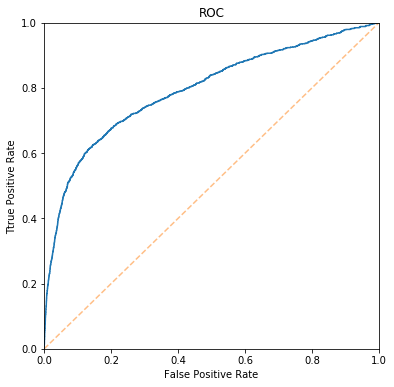

In [17]:
clf = LogisticRegression(penalty='l2',random_state=0)

prediction(clf)

#### Tune C

In [13]:
#the grid of parameters to search over
Cs = [5,10,15]
Cs2 = list(np.arange(10,70,5))
max_score = 0
# your turn
for C in Cs:
    clf = LogisticRegression(C=C,penalty='l2',random_state=1)
    score = cv_score(clf, X.values, y.values)
#     print (score)
    if score > max_score:
        max_score = score
        Cfinal = C
print ("Maximum score of {} is achieved at C = {}".format(max_score,Cfinal))

Maximum score of 0.22973732742729397 is achieved at C = 10



Classification Report on the Training data -
              precision    recall  f1-score   support

          0       0.91      0.99      0.95     14536
          1       0.67      0.24      0.35      1778

avg / total       0.89      0.90      0.88     16314

Accuracy Score = 0.897397131533

Confusion Matrix -
 [[21327   330]
 [ 2181   635]]

Classification Report -
              precision    recall  f1-score   support

          0       0.91      0.98      0.94     21657
          1       0.66      0.23      0.34      2816

avg / total       0.88      0.90      0.87     24473

Area under the ROC curve = 0.7852652092332104


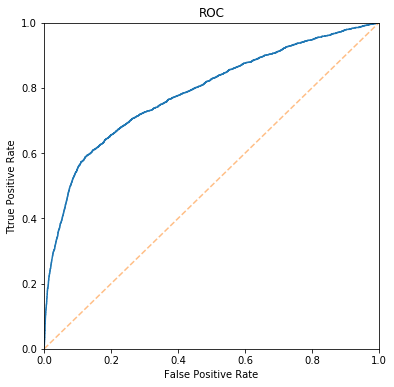

In [14]:
# your turn
clf = LogisticRegression(C=Cfinal,random_state=1)

prediction(clf)

* **Attempt 1 : Basic Clean Data                : 0.901201274822**
* **Attempt 2 : Basic Clean Data + Categorical age and pdays              : 0.901201274822**
* **Attempt 3 : Basic Clean Data + Normalization : 0.902263626706**
* **Attempt 4 : Basic Clean Data + Normalization + Categorical age and pdays: 0.902263626706**


### Take 2

* **Attempt 1 : LabelEncoding (clean_data_basic.csv) + Normalization**
    * F1 score = 0.3470169677066229
    * Area under the ROC curve = 0.8009772686041277
    * Accuracy Score = 0.902508784833
* **Attempt 2 : OneHotEncoding (clean_data_22_features.csv) + Normalization**
    * F1 score = 0.3194130925507901
    * Area under the ROC curve = 0.7952553149576181
    * Accuracy Score = 0.901446432949

In this problem it might make sence to optimize towards maximizing towards accurate prediction of people who will subscribe to the service.
In this case we accurately predicted 317 people out of 179. So, let's try making that a scoring criteria.
** In our context - that is True Positives / Actual Positives, i.e. True Positive Rate / Recall / Sensitivity

## SVC

In [118]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV


 405.112171 seconds
Accuracy Score = 0.897932499796
Confusion Matrix -
 [[10723   170]
 [ 1079   265]]

Classification Report -
              precision    recall  f1-score   support

          0       0.91      0.98      0.94     10893
          1       0.61      0.20      0.30      1344

avg / total       0.88      0.90      0.87     12237

Area under the ROC curve = 0.6969505591183504


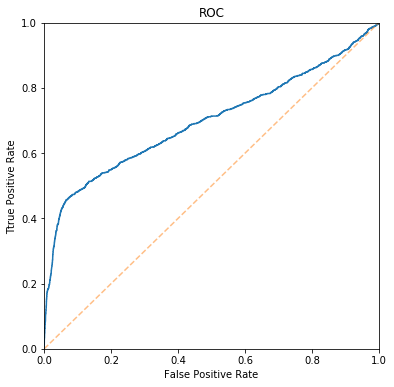

In [119]:
#SVC
t = time.time()
svc = SVC(probability=True,random_state=5)
svc.fit(X,y)
print("\n %f seconds" % (time.time() - t))
t = time.time()
prediction(svc)
print("\n %f seconds" % (time.time() - t))

In [120]:
#LinearSVC
t = time.time()
linsvc = LinearSVC(dual=False,random_state=5)
linsvc.fit(X,y)
print("\n %f seconds" % (time.time() - t))


 0.543031 seconds


In [125]:
t = time.time()
prediction(linsvc)
print("\n %f seconds" % (time.time() - t))

Accuracy Score = 0.901773310452

Confusion Matrix -
 [[10747   146]
 [ 1056   288]]

Classification Report -
              precision    recall  f1-score   support

          0       0.91      0.99      0.95     10893
          1       0.66      0.21      0.32      1344

avg / total       0.88      0.90      0.88     12237

Cannot draw ROC - predict_proba is not an attribute

 1.097063 seconds


In [ ]:
#Tuning Using GridSearchCV
parameters = {'kernel':('linear', 'rbf'),'C':[1,5,10],  'gamma': 
              [0.01,0.10,0.5]}
# 
svr = SVC()
grid = GridSearchCV(svr, parameters, scoring='recall')
grid.fit(X.values, y.values)

In [ ]:
grid.best_estimator_
# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#   decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
#   max_iter=-1, probability=False, random_state=None, shrinking=True,
#   tol=0.001, verbose=False)

In [126]:
# your turn
t = time.time()
svcfinal = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=5, shrinking=True,
  tol=0.001, verbose=False)
svcfinal.fit(X, y)
print("\n %f seconds" % (time.time() - t))


 455.175035 seconds


Accuracy Score = 0.898504535425

Confusion Matrix -
 [[10730   163]
 [ 1079   265]]

Classification Report -
              precision    recall  f1-score   support

          0       0.91      0.99      0.95     10893
          1       0.62      0.20      0.30      1344

avg / total       0.88      0.90      0.87     12237

Area under the ROC curve = 0.7030655403972844

 1205.446948 seconds


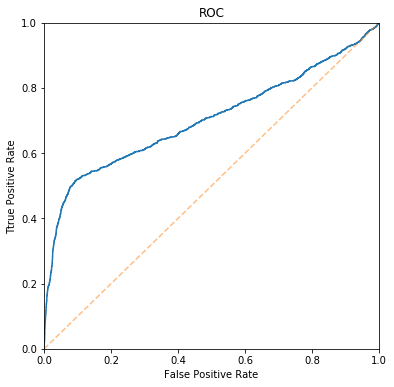

In [127]:
t = time.time()
prediction(svcfinal)
print("\n %f seconds" % (time.time() - t))

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier


Classification Report on the Training data -
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     14536
          1       0.99      0.98      0.99      1778

avg / total       1.00      1.00      1.00     16314

Accuracy Score = 0.892248600499

Confusion Matrix -
 [[21026   631]
 [ 2006   810]]

Classification Report -
              precision    recall  f1-score   support

          0       0.91      0.97      0.94     21657
          1       0.56      0.29      0.38      2816

avg / total       0.87      0.89      0.88     24473

Area under the ROC curve = 0.7759366673514126


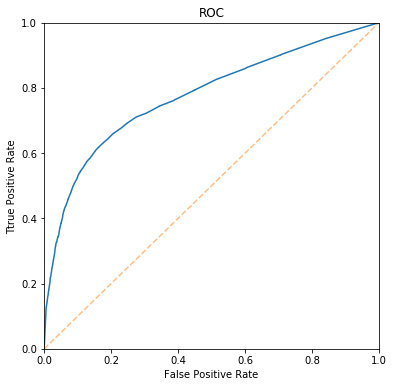

In [53]:
#Initial Run
rf = RandomForestClassifier(n_estimators=100, max_depth=None, oob_score=True)
rf.fit(X,y)

prediction(rf)

### Feature Importances

(-1, 23)

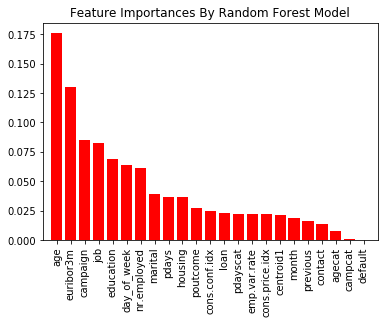

In [22]:
predictors = list(features.columns)

importances=rf.feature_importances_

indices = np.argsort(importances)[::-1]

sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])
    
plt.figure()
plt.title("Feature Importances By Random Forest Model")
plt.bar(range(np.size(predictors)), importances[indices],
       color="r")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)])

In [ ]:
# for i in sorted_important_features:
#     print(i)

In [17]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

parameters = {'n_estimators':[20,30,50,100,200],
              'max_features':['sqrt','log2',None],
             'criterion':['gini','entropy'],
             'min_samples_split':[2,10,0.01]}

t = time.time()
gs = GridSearchCV(rf,parameters,cv=5,scoring='recall',n_jobs=-1)
print("\n %f seconds" % (time.time() - t))
t = time.time()
gs.fit(X,y)
print("\n %f seconds" % (time.time() - t))


 0.000000 seconds

 941.851871 seconds



 814.242572 seconds

Classification Report on the Training data -
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     14536
          1       1.00      0.98      0.99      1778

avg / total       1.00      1.00      1.00     16314

Accuracy Score = 0.890287255343

Confusion Matrix -
 [[20954   703]
 [ 1982   834]]

Classification Report -
              precision    recall  f1-score   support

          0       0.91      0.97      0.94     21657
          1       0.54      0.30      0.38      2816

avg / total       0.87      0.89      0.88     24473

Area under the ROC curve = 0.7709784237434253

 1742.624672 seconds


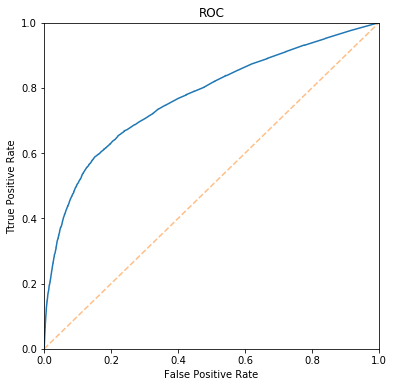

In [19]:
t = time.time()
# gs.fit(X,y)
print("\n %f seconds" % (time.time() - t))
t = time.time()
prediction(gs)
print("\n %f seconds" % (time.time() - t))

## Other Trees

#### (ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier)

In [45]:
#Extra Trees
t = time.time()
et = ExtraTreesClassifier(criterion='gini',n_estimators=200)
parameters = {'max_features':['sqrt','log2'],
             'min_samples_split':[2,10,20]}

t = time.time()
gs = GridSearchCV(et,parameters,cv=5,n_jobs=-1)
print("\n %f seconds" % (time.time() - t))
t = time.time()
gs.fit(X,y)
print("\n %f seconds" % (time.time() - t))


 0.007000 seconds

 89.270106 seconds



Classification Report on the Training data -
              precision    recall  f1-score   support

          0       0.94      1.00      0.97     14536
          1       0.94      0.51      0.66      1778

avg / total       0.94      0.94      0.94     16314

Accuracy Score = 0.897560576962
Recall Score =  0.260298295455

Confusion Matrix -
 [[21233   424]
 [ 2083   733]]

Classification Report -
              precision    recall  f1-score   support

          0       0.91      0.98      0.94     21657
          1       0.63      0.26      0.37      2816

avg / total       0.88      0.90      0.88     24473

Area under the ROC curve = 0.7807566663702057

 18.244044 seconds


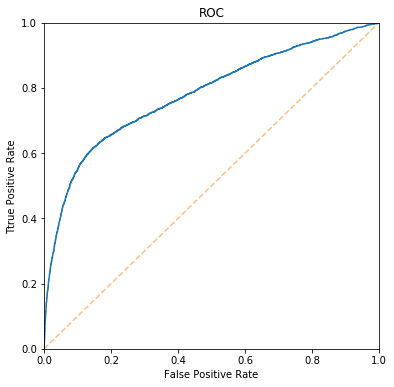

In [46]:
t = time.time()
prediction(gs.best_estimator_)
# print ("\n", gs.best_estimator_)
# print ("\n", gs.cv_results_)
# print ("\n", gs.grid_scores_)
print("\n %f seconds" % (time.time() - t))

Classification Report on the Training data -
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     14536
          1       1.00      0.97      0.99      1778

avg / total       1.00      1.00      1.00     16314

Accuracy Score = 0.876762146038
Recall Score =  0.305042613636

Confusion Matrix -
 
 [[20598  1059]
 
 [ 1957   859]]

Classification Report -
              precision    recall  f1-score   support

          0       0.91      0.95      0.93     21657
          1       0.45      0.31      0.36      2816

avg / total       0.86      0.88      0.87     24473

Area under the ROC curve = 0.7393755647187348

In [47]:
# t = time.time()
# prediction(gs.best_estimator_)
# print("\n %f seconds" % (time.time() - t))

In [48]:
#AdaBoostClassifier
t = time.time()
ada = AdaBoostClassifier()
parameters = {'n_estimators':[20,30,50,100,200],
              'learning_rate':[1,0.8,0.6,0.4],
              'algorithm':["SAMME", "SAMME.R"]}

t = time.time()
gs = GridSearchCV(ada,parameters,cv=5,n_jobs=-1)
print("\n %f seconds" % (time.time() - t))
t = time.time()
gs.fit(X,y)
print("\n %f seconds" % (time.time() - t))


 0.013001 seconds

 170.162733 seconds



Classification Report on the Training data -
              precision    recall  f1-score   support

          0       0.91      0.99      0.95     14536
          1       0.68      0.23      0.35      1778

avg / total       0.89      0.90      0.88     16314

Accuracy Score = 0.89760143832
Recall Score =  0.218394886364

Confusion Matrix -
 [[21352   305]
 [ 2201   615]]

Classification Report -
              precision    recall  f1-score   support

          0       0.91      0.99      0.94     21657
          1       0.67      0.22      0.33      2816

avg / total       0.88      0.90      0.87     24473

Area under the ROC curve = 0.7845114392601384

 10.511601 seconds


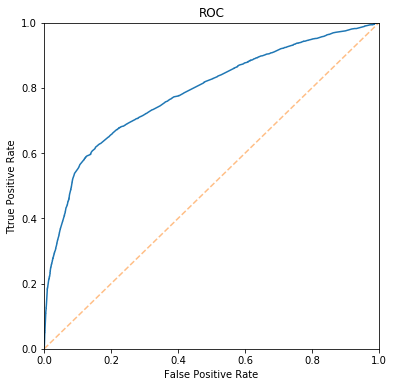

In [49]:
t = time.time()
prediction(gs.best_estimator_)
print("\n %f seconds" % (time.time() - t))

In [50]:
#Gradient Boosting Classifier
t = time.time()
gb = GradientBoostingClassifier()
parameters = {'loss':['deviance', 'exponential'],
             'n_estimators':[20,30,50,100,200],
              'learning_rate':[0.1,0.5,1.0],
              'max_features':['sqrt','log2',None],
             'min_samples_split':[2,10,0.01]}

t = time.time()
gs = GridSearchCV(gb,parameters,cv=5,scoring='recall',n_jobs=-1)
print("\n %f seconds" % (time.time() - t))
t = time.time()
gs.fit(X,y)
print("\n %f seconds" % (time.time() - t))


 0.000000 seconds

 1027.810787 seconds



Classification Report on the Training data -
              precision    recall  f1-score   support

          0       0.94      0.98      0.96     14536
          1       0.76      0.44      0.56      1778

avg / total       0.92      0.92      0.92     16314

Accuracy Score = 0.886282842316
Recall Score =  0.286576704545

Confusion Matrix -
 [[20883   774]
 [ 2009   807]]

Classification Report -
              precision    recall  f1-score   support

          0       0.91      0.96      0.94     21657
          1       0.51      0.29      0.37      2816

avg / total       0.87      0.89      0.87     24473

Area under the ROC curve = 0.7381435301204313

 2529.083219 seconds


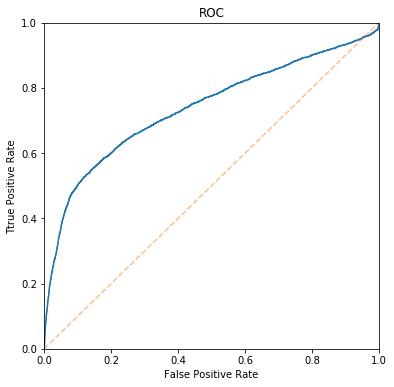

In [51]:
t = time.time()
prediction(gs)
print("\n %f seconds" % (time.time() - t))